# CONJUNTO DE EJERCICIOS

1. Use el método de bisección para encontrar soluciones precisas dentro de $10^{-2}$ para 
   $x^3 - 7x^2 + 14x - 6 = 0$ en cada intervalo.  
   a. $[0,1]$  
   b. $[1,3.2]$  
   c. $[3.2,4]$  



In [2]:


def f(x):
    return x**3 - 7*x**2 + 14*x - 6

def biseccion(a, b, tol=1e-2, max_iter=100):
    if f(a) * f(b) > 0:
        print(f"No hay cambio de signo en el intervalo [{a}, {b}]")
        return None
    
    iteracion = 0
    while (b - a) / 2 > tol and iteracion < max_iter:
        iteracion += 1
        c = (a + b) / 2
        if f(c) == 0:
            break
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return c, iteracion


intervalos = [(0,1), (1,3.2), (3.2,4)]

print("=== Método de Bisección ===\n")
for i, (a,b) in enumerate(intervalos, start=1):
    raiz, iteraciones = biseccion(a, b)
    if raiz is not None:
        print(f"Intervalo {i}: [{a}, {b}]")
        print(f" → Raíz aproximada: x ≈ {raiz:.4f}")
        print(f" → Iteraciones: {iteraciones}\n" + "-"*40)


=== Método de Bisección ===

Intervalo 1: [0, 1]
 → Raíz aproximada: x ≈ 0.5781
 → Iteraciones: 6
----------------------------------------
Intervalo 2: [1, 3.2]
 → Raíz aproximada: x ≈ 3.0109
 → Iteraciones: 7
----------------------------------------
Intervalo 3: [3.2, 4]
 → Raíz aproximada: x ≈ 3.4125
 → Iteraciones: 6
----------------------------------------



2.  
   a. Dibuje las gráficas para $y = x$ y $y = \sin x$.  
   b. Use el método de bisección para encontrar soluciones precisas dentro de $10^{-5}$ para el primer valor positivo de $x$ con $x = 2 \sin x$.  



=== Método de Bisección para x = 2 sin(x) ===
Primera solución positiva: x ≈ 1.895491
Iteraciones: 18


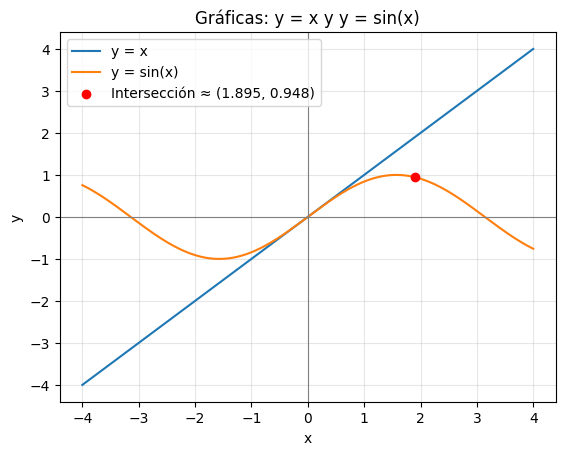

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ---- (b) Método de bisección para x = 2 sin(x) ----
def g(x):
    # g(x) = x - 2*sin(x)
    return x - 2*np.sin(x)

def biseccion(a, b, tol=1e-5, max_iter=200):
    fa, fb = g(a), g(b)
    if fa * fb > 0:
        raise ValueError(f"No hay cambio de signo en [{a}, {b}]")
    it = 0
    while (b - a) / 2.0 > tol and it < max_iter:
        it += 1
        c = (a + b) / 2.0
        fc = g(c)
        if fc == 0:
            a = b = c
            break
        if fa * fc < 0:
            b = c
            fb = fc
        else:
            a = c
            fa = fc
    return (a + b) / 2.0, it

# Buscar la primera raíz positiva (en 0, π)
root, iters = biseccion(1e-6, np.pi, tol=1e-5)

print("=== Método de Bisección para x = 2 sin(x) ===")
print(f"Primera solución positiva: x ≈ {root:.6f}")
print(f"Iteraciones: {iters}")

# ---- (a) Graficar y = x y y = sin(x) ----
x = np.linspace(-4, 4, 800)
y1 = x
y2 = np.sin(x)

plt.figure()
plt.plot(x, y1, label='y = x')
plt.plot(x, y2, label='y = sin(x)')
plt.scatter([root], [np.sin(root)], color='red', zorder=5,
            label=f'Intersección ≈ ({root:.3f}, {np.sin(root):.3f})')
plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)
plt.title('Gráficas: y = x y y = sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


3.  
   a. Dibuje las gráficas para $y = x$ y $y = \tan x$.  
   b. Use el método de bisección para encontrar una aproximación dentro de $10^{-5}$ para el primer valor positivo de $x$ con $x = \tan x$.  



=== x = tan(x) con Bisección ===
Primera solución positiva: x ≈ 4.493407
Iteraciones: 17


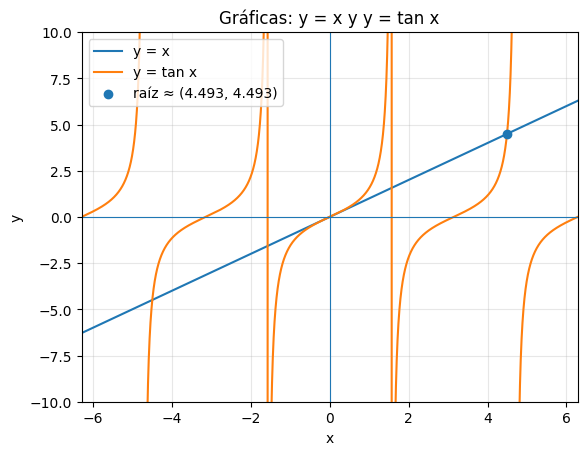

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def h(x):
    return x - np.tan(x)

def biseccion(a, b, tol=1e-5, max_iter=200):
    fa, fb = h(a), h(b)
    if np.isnan(fa) or np.isnan(fb):
        raise ValueError("Extremos no válidos (tan indefinida).")
    if fa * fb > 0:
        raise ValueError(f"No hay cambio de signo en [{a}, {b}].")

    it = 0
    while (b - a) / 2.0 > tol and it < max_iter:
        it += 1
        c = (a + b) / 2.0
        fc = h(c)
        if fc == 0:
            a = b = c
            break
        if fa * fc < 0:
            b, fb = c, fc
        else:
            a, fa = c, fc
    return (a + b) / 2.0, it

a = np.pi + 1e-6
b = 1.5*np.pi - 1e-6
root, iters = biseccion(a, b, tol=1e-5)

print("=== x = tan(x) con Bisección ===")
print(f"Primera solución positiva: x ≈ {root:.6f}")
print(f"Iteraciones: {iters}")

x = np.linspace(-2*np.pi, 2*np.pi, 4000)
y_linea = x

y_tan = np.tan(x)
y_tan[np.isclose(np.cos(x), 0, atol=1e-3)] = np.nan 

plt.figure()
plt.plot(x, y_linea, label='y = x')
plt.plot(x, y_tan, label='y = tan x')
plt.scatter([root], [np.tan(root)], zorder=5, label=f'raíz ≈ ({root:.3f}, {np.tan(root):.3f})')
plt.axhline(0, linewidth=0.8)
plt.axvline(0, linewidth=0.8)
plt.ylim(-10, 10) 
plt.xlim(-2*np.pi, 2*np.pi)
plt.title('Gráficas: y = x y y = tan x')
plt.xlabel('x'); plt.ylabel('y')
plt.grid(True, alpha=0.3); plt.legend()
plt.show()


4.  
   a. Dibuje las gráficas para $y = x^2 - 1$ y $y = e^{1 - x^2}$.  
   b. Use el método de bisección para encontrar una aproximación dentro de $10^{-3}$ para un valor en $[-2,0]$ con  
   $x^2 - 1 = e^{1 - x^2}$.  



=== Bisección para x^2 - 1 = e^(1 - x^2) ===
Raíz en [-2, 0]: x ≈ -1.250977
Iteraciones: 10


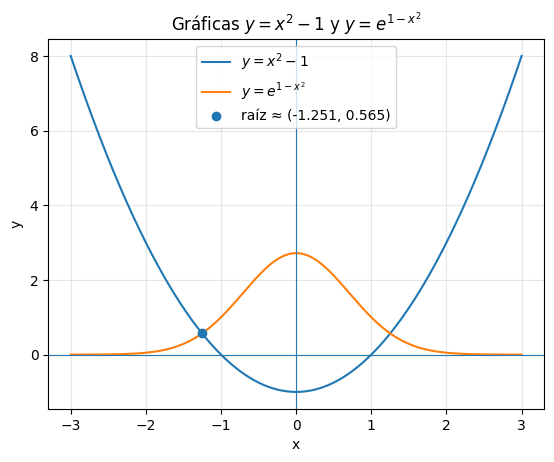

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def h(x):
    return x**2 - 1 - np.exp(1 - x**2)

def biseccion(a, b, tol=1e-3, max_iter=200):
    fa, fb = h(a), h(b)
    if fa * fb > 0:
        raise ValueError(f"No hay cambio de signo en [{a}, {b}]. fa={fa}, fb={fb}")
    it = 0
    while (b - a)/2.0 > tol and it < max_iter:
        it += 1
        c = (a + b) / 2.0
        fc = h(c)
        if fc == 0:
            a = b = c
            break
        if fa * fc < 0:
            b, fb = c, fc
        else:
            a, fa = c, fc
    return (a + b) / 2.0, it


root, iters = biseccion(-2.0, 0.0, tol=1e-3)

print("=== Bisección para x^2 - 1 = e^(1 - x^2) ===")
print(f"Raíz en [-2, 0]: x ≈ {root:.6f}")
print(f"Iteraciones: {iters}")

x = np.linspace(-3, 3, 800)
y1 = x**2 - 1
y2 = np.exp(1 - x**2)

plt.figure()
plt.plot(x, y1, label=r'$y=x^2-1$')
plt.plot(x, y2, label=r'$y=e^{1-x^2}$')
plt.scatter([root], [root**2 - 1], zorder=5,
            label=f'raíz ≈ ({root:.3f}, {(root**2-1):.3f})')
plt.axhline(0, linewidth=0.8); plt.axvline(0, linewidth=0.8)
plt.xlabel('x'); plt.ylabel('y')
plt.title(r'Gráficas $y=x^2-1$ y $y=e^{1-x^2}$')
plt.grid(True, alpha=0.3); plt.legend()
plt.show()


5. Sea $f(x) = (x + 3)(x + 1)^2(x - 1)^3(x - 3)$.  
   ¿En qué cero de $f$ converge el método de bisección cuando se aplica en los siguientes intervalos?  
   a. $[-1.5, 2.5]$  
   b. $[-0.5, 2.4]$  
   c. $[-0.5, 3]$  
   d. $[-3, -0.5]$  

In [ ]:
import numpy as np


def f(x):
    return (x + 3) * (x + 1)**2 * x * (x - 1)**3 * (x - 3)


def verificar_intervalo(a, b):
    fa, fb = f(a), f(b)
    print(f"Intervalo [{a}, {b}] -> f(a)={fa:.6f}, f(b)={fb:.6f}")
    if np.isclose(fa, 0, atol=1e-6):
        return f"Converge a raíz en x = {a}"
    elif np.isclose(fb, 0, atol=1e-6):
        return f"Converge a raíz en x = {b}"
    elif fa * fb < 0:
        return "Cambio de signo → Sí aplica bisección"
    else:
        return "Sin cambio de signo → No converge"


intervalos = [
    (-1.5, 2.5),
    (-0.5, 2.4),
    (-0.5, 3),
    (-3, -0.5)
]

print("=== Verificación de intervalos para el método de bisección ===\n")
for i, (a, b) in enumerate(intervalos, start=1):
    resultado = verificar_intervalo(a, b)
    print(f"{chr(96+i)}) {resultado}\n")


=== Verificación de intervalos para el método de bisección ===

Intervalo [-1.5, 2.5] -> f(a)=-39.550781, f(b)=-284.238281
a) Sin cambio de signo → No converge

Intervalo [-0.5, 2.4] -> f(a)=-3.691406, f(b)=-246.659697
b) Sin cambio de signo → No converge

Intervalo [-0.5, 3] -> f(a)=-3.691406, f(b)=0.000000
c) Converge a raíz en x = 3

Intervalo [-3, -0.5] -> f(a)=0.000000, f(b)=-3.691406
d) Converge a raíz en x = -3



# EJERCICIOS APLICADOS

1. Un abrevadero de longitud $L$ tiene una sección transversal en forma de semicírculo con radio $r$. (Consulte la figura adjunta.)  
   Cuando se llena con agua hasta una distancia $h$ a partir de la parte superior, el volumen $V$ de agua es:

   $$V = L\left[\tfrac12 \pi r^2 - r^2 \arcsin\!\left(\tfrac{h}{r}\right) - h\,\sqrt{r^2 - h^2}\right]$$
   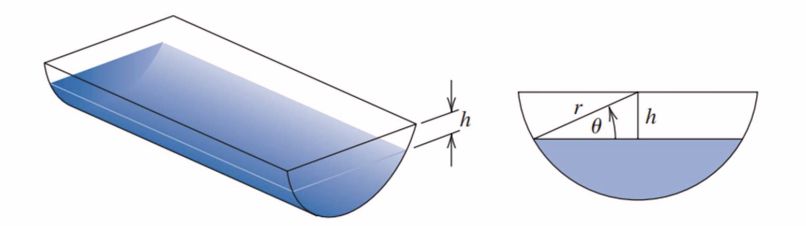


   Suponga que $L = 10 \, cm$, $r = 1 \, cm$ y $V = 12.4 \, cm^3$.  
   Encuentre la profundidad del agua en el abrevadero dentro de $0.01 \, cm$.


In [5]:
import math


L = 10.0      # cm
r = 1.0       # cm
V_obj = 12.4  # cm^3


def V(h):
    return L * (0.5 * math.pi * r**2
                - r**2 * math.asin(h / r)
                - h * math.sqrt(r**2 - h**2))


def biseccion_h(a=0.0, b=1.0, tol=0.01, max_iter=200):
    fa = V(a) - V_obj
    fb = V(b) - V_obj
    if fa * fb > 0:
        raise ValueError("No hay cambio de signo en [0, r]; revisa datos.")
    it = 0
    while (b - a)/2.0 > tol and it < max_iter:
        it += 1
        c = (a + b) / 2.0
        fc = V(c) - V_obj
        if fc == 0:
            a = b = c
            break
        if fa * fc < 0:
            b, fb = c, fc
        else:
            a, fa = c, fc
    h = (a + b) / 2.0
    return h, it

h, iters = biseccion_h(tol=0.01)   
profundidad = r - h                 

print("=== Abrevadero semicircular ===")
print(f"h (desde la parte superior) ≈ {h:.3f} cm")
print(f"Profundidad del agua d = r - h ≈ {profundidad:.3f} cm")
print(f"Iteraciones: {iters}")


=== Abrevadero semicircular ===
h (desde la parte superior) ≈ 0.164 cm
Profundidad del agua d = r - h ≈ 0.836 cm
Iteraciones: 6


2. Un objeto que cae verticalmente a través del aire está sujeto a una resistencia viscosa, así como a la fuerza de gravedad.  
   Suponga que un objeto con masa $m$ cae desde una altura $s_0$ y que la altura del objeto después de $t$ segundos es:

   $$
   s(t) = s_0 - \frac{mg}{k} t + \frac{m g}{k^2} \left( 1 - e^{-kt/m} \right)
   $$

   donde $g = 9.81 \, m/s^2$ y $k$ representa el coeficiente de la resistencia del aire en $N \, s/m$.

   Suponga $s_0 = 300 \, m$, $m = 0.25 \, kg$ y $k = 0.1 \, N s/m$.

   Encuentre, dentro de $0.01 \, segundos$, el tiempo que tarda un cuarto de kg en golpear el piso.

In [6]:
import math


g = 9.81          # m/s^2
s0 = 300.0        # m
m  = 0.25         # kg
k  = 0.10         # N*s/m


def s(t):
    return s0 - (m*g/k)*t + (m*m*g)/(k*k) * (1.0 - math.exp(-k*t/m))


def bracket():
    a, b = 0.0, 1.0
    while s(b) > 0:
        a, b = b, 2.0*b   
        if b > 1e4:
            raise RuntimeError("No se pudo acotar la raíz.")
    return a, b


def biseccion(f, a, b, tol=0.01, max_iter=200):
    fa, fb = f(a), f(b)
    if fa*fb > 0:
        raise ValueError("No hay cambio de signo en el intervalo.")
    it = 0
    while (b - a)/2.0 > tol and it < max_iter:
        it += 1
        c = (a + b)/2.0
        fc = f(c)
        if fc == 0.0:
            a = b = c
            break
        if fa*fc < 0:
            b, fb = c, fc
        else:
            a, fa = c, fc
    return (a + b)/2.0, it


a, b = bracket()
t_hit, iters = biseccion(s, a, b, tol=0.01)  

print("=== Caída con resistencia viscosa ===")
print(f"Intervalo inicial: [{a:.2f}, {b:.2f}] s")
print(f"Tiempo de impacto ≈ {t_hit:.2f} s (precisión ±0.01 s)")
print(f"Altura en ese instante s(t) ≈ {s(t_hit):.6f} m")
print(f"Iteraciones: {iters}")


=== Caída con resistencia viscosa ===
Intervalo inicial: [8.00, 16.00] s
Tiempo de impacto ≈ 14.73 s (precisión ±0.01 s)
Altura en ese instante s(t) ≈ -0.025990 m
Iteraciones: 9


# EJERCICIOS TEÓRICOS

1. Use el teorema 2.1 para encontrar una cota para el número de iteraciones necesarias para lograr una aproximación con precisión de $10^{-4}$ para la solución de $x^3 - x - 1 = 0$ que se encuentra dentro del intervalo $[1, 2]$. Encuentre una aproximación para la raíz con este grado de precisión.



In [7]:
import math

# Función
def f(x):
    return x**3 - x - 1

# Datos del problema
a, b = 1, 2
tol = 1e-4

# 1. Calcular número de iteraciones con el teorema 2.1
n_teorico = math.ceil(math.log2((b - a) / tol))
print(f"Iteraciones necesarias según Teorema 2.1: {n_teorico}")

# 2. Aplicar método de bisección con esa precisión
def biseccion(a, b, tol=1e-4, max_iter=100):
    fa, fb = f(a), f(b)
    if fa * fb > 0:
        raise ValueError("No hay cambio de signo en el intervalo.")
    it = 0
    while (b - a)/2.0 > tol and it < max_iter:
        it += 1
        c = (a + b) / 2.0
        fc = f(c)
        if fc == 0:
            a = b = c
            break
        if fa * fc < 0:
            b, fb = c, fc
        else:
            a, fa = c, fc
    return (a + b) / 2.0, it

raiz, iter_real = biseccion(a, b, tol)

print(f"Aproximación de la raíz: x ≈ {raiz:.6f}")
print(f"Iteraciones ejecutadas: {iter_real}")


Iteraciones necesarias según Teorema 2.1: 14
Aproximación de la raíz: x ≈ 1.324768
Iteraciones ejecutadas: 13


2. La función definida por $f(x) = \sin(\pi x)$ tiene ceros en cada entero. Muestre que cuando $-1 < a < 0$ y $2 < b < 3$, el método de bisección converge a

   a. $0$, si $a + b < 2$  
   b. $2$, si $a + b > 2$  
   c. $1$, si $a + b = 2$


In [ ]:
import math


def f(x):
    return math.sin(math.pi * x)


def biseccion(a, b, tol=1e-6, max_iter=50):
    fa, fb = f(a), f(b)
    if fa * fb > 0:
        raise ValueError("No hay cambio de signo en el intervalo.")
    
    for i in range(max_iter):
        c = (a + b) / 2
        fc = f(c)
        if abs(fc) < tol or (b - a) / 2 < tol:
            return c
        if fa * fc < 0:
            b, fb = c, fc
        else:
            a, fa = c, fc
    return (a + b) / 2

# Ejemplos
casos = [
    (-0.8, 2.5),  
    (-0.5, 2.8),  
    (-0.5, 2.5),
]

print("=== Demostración del método de bisección para f(x)=sin(pi*x) ===\n")

for a, b in casos:
    raiz = biseccion(a, b)
    print(f"Intervalo [{a}, {b}] → a+b={a+b:.2f} → Raíz ≈ {raiz:.6f}")


=== Demostración del método de bisección para f(x)=sin(pi*x) ===

Intervalo [-0.8, 2.5] → a+b=1.70 → Raíz ≈ 0.000000
Intervalo [-0.5, 2.8] → a+b=2.30 → Raíz ≈ 2.000000
Intervalo [-0.5, 2.5] → a+b=2.00 → Raíz ≈ 1.000000
